## Ukraine - Russian War Twitter Sentiment Analysis

I acquired the dataset I'm using for the Twitter sentiment analysis on the Ukraine and Russia War from Kaggle. This data was gathered from Twitter and is updated on a regular basis.

In [1]:
# import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# import dataset
data = pd.read_csv("twitterdata.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1527116094334451714  1527116094334451714  2022-05-19 02:37:03 UTC   
1  1527116081890041856  1527023988605652993  2022-05-19 02:37:01 UTC   
2  1527116065704230914  1525152686642851840  2022-05-19 02:36:57 UTC   
3  1527116039342858241  1527116039342858241  2022-05-19 02:36:50 UTC   
4  1527116034167087104  1527116034167087104  2022-05-19 02:36:49 UTC   

         date      time  timezone              user_id      username  \
0  2022-05-19  02:37:03         0  1519039822626762752  dossierworld   
1  2022-05-19  02:37:01         0  1258053134003458048  cornpopsmoke   
2  2022-05-19  02:36:57         0            543710112   cloudmasher   
3  2022-05-19  02:36:50         0  1444366504322080769     botatleti   
4  2022-05-19  02:36:49         0   867254716237000704    evertchan1   

                                              name place  ... geo source  \
0                                          Dossier   NaN  

In [3]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


For this analysis, I just need three columns (username, tweet, and language); I will only select these columns and proceed:

In [4]:
data = data[["username", "tweet", "language"]]

Check for null values:

In [5]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

Check the languages used in the Tweets: 

In [6]:
data["language"].value_counts()

en     8793
pt      487
und     181
it      127
in       64
ja       64
es       55
fr       36
de       33
ru       23
ca       21
hi       21
ro       14
ar       11
tl        7
fi        7
nl        7
zh        7
cs        6
et        5
ur        5
sv        4
pl        4
ml        3
uk        3
th        2
bg        2
fa        2
da        2
ta        2
tr        2
lt        1
vi        1
ht        1
cy        1
Name: language, dtype: int64

The majority of the tweets are in English. Now to get this information ready for sentiment analysis. All links, punctuation, symbols, and other language problems will be removed from the tweets here:

In [7]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


I will have a look at the tweets' wordcloud, which displays the most commonly used words in tweets by people expressing their thoughts and updates on the Ukraine-Russia conflict:

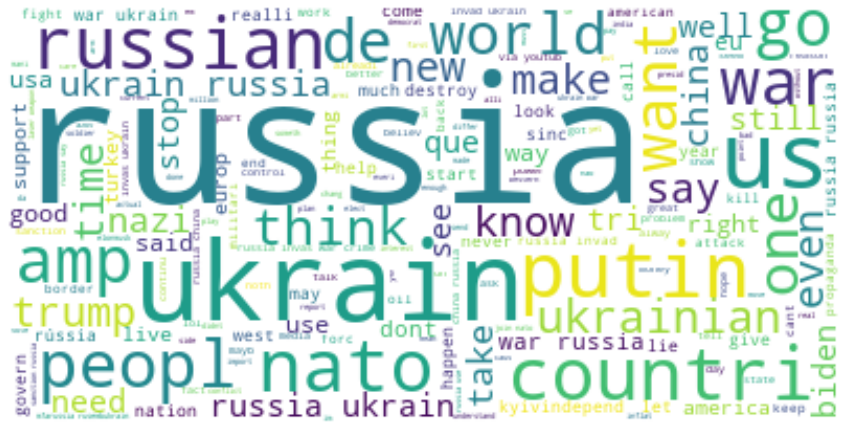

In [8]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

By computing the sentiment scores of the tweets, I'll add three more columns to this dataset: Positive, Negative, and Neutral:

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
                                               tweet  Positive  Negative  \
0  oday retir colonel mikhail khodaryonok made an...     0.000     0.248   
1  susiecmd  matthewstol ukrain treat like unoffi...     0.268     0.000   
2  dmbobrovspb  realitymembran wittesergei russia...     0.275     0.000   
3  atleta joão dória foi encaminhado para delegac...     0.000     0.000   
4  ukrain updat satellit tell hot stori ukrain dr...     0.000     0.000   

   Neutral  
0    0.752  
1    0.732  
2    0.725  
3    1.000  
4    1.000  


I will check the most commonly used terms by persons who have a positive sentiment:

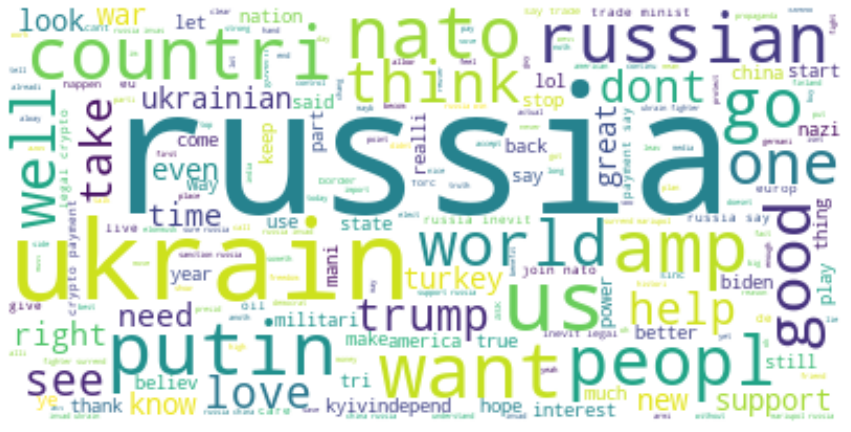

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

And now the negative: 

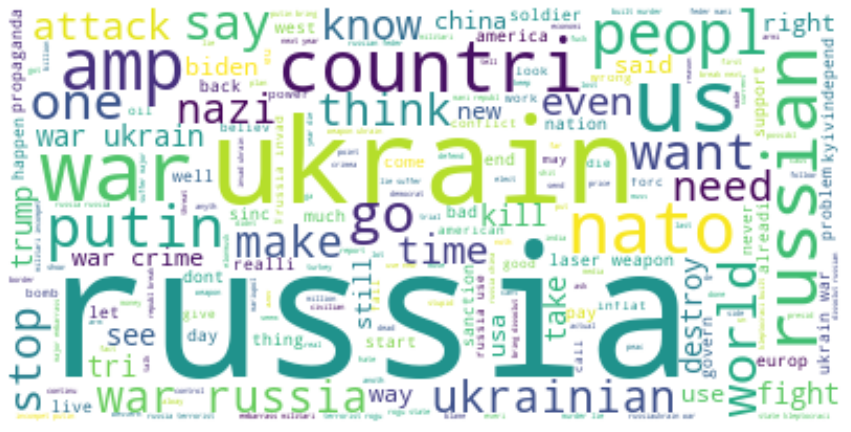

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()